05/2022

## Práctica de Splines: Mariposa

Isabel Morro Tabares y Francisca Morales Castellón

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SplineNatural (x, y): 
    
    "Devuelve la matriz nx4 de los coeficientes del polinomio"
    "Cada fila corresponde a un polinomio"
    
    # Declaración de variables
    n = len(x)
    A=np.zeros([n,n])
    b = np.zeros(n) 
    h = np.zeros(n-1)
    pendiente = np.zeros(n-1)
    d = np.zeros(n)
    spline = np.zeros([n-1,4]) 
    
    # Cálculo de las longitudes y las pendientes
    for i in range (0, n-1):
        h[i] = x[i+1]-x[i]
        pendiente[i] = (y[i+1] - y[i]) / h[i] 
    
    # Creación de la matriz de coeficientes    
    A[0][0] = 2/h[0]
    A[0][1] = 1/h[0]
    
    A[n-1][n-1] = 2/h[n-2]
    A[n-1][n-2] = 1/h[n-2]
    
    for j in range (1,n-1):
        
        A[j][j] = 2*((1/h[j])+(1/h[j-1]))
        A[j][j-1] = 1/h[j-1]
        A[j][j+1] = 1/h[j]
    
    # Creación del array de términos independientes
    b[0] = pendiente[0] / h[0]
    b[n-1] = pendiente[n-2] / h[n-2]
    
    for k in range (1,n-1):
        b[k] = (pendiente[k] / h[k]) + (pendiente [k-1]/ h[k-1])
    b = 3*b
    
    # Obtención de las derivadas
    d = np.linalg.solve(A,b)
    
   # Cálculo de polinomios
    for i in range (0,n-1) : 
        spline [i][0] = y[i]
        spline [i][1] = d[i]
        spline [i][2] = (pendiente[i]-d[i])/h[i]
        spline [i][3] = ((d[i]+d[i+1])-2*pendiente[i])/(h[i]**2)
        
    return spline

In [3]:
def plotspline (x,y,color):
    
    n = len(x) # Número de puntos de x e y (= dimensión)
    
    t = np.arange (0,n,1) # t en [0, N]
    
    # Construimos una curva paramétrica
    # c(t) = (x(t), y(t))
    
    sx = SplineNatural (t,x)
    sy = SplineNatural (t,y)
    
    # Puntos donde estudiamos la curva
    p = np.arange (0,n-1,0.01)
    
    _x = np.zeros (len(p)+len(sx)-(n-1))
    _y = np.zeros (len(p)+len(sy)-(n-1))
    
    # Cálculo de arrays (_x, _y) a representar
    for i in range (0,len(t)):
        for j in range (0,len(p)):
            if (i <= p[j] and p[j] < i+1):
                _x[j] = sx[i][0] + sx[i][1]*(p[j]-t[i])+sx[i][2]*(p[j]-t[i])**2+sx[i][3]*(p[j]-t[i]**2)*(p[j]-t[i+1])
                _y[j] = sy[i][0] + sy[i][1]*(p[j]-t[i])+sy[i][2]*(p[j]-t[i])**2+sy[i][3]*(p[j]-t[i]**2)*(p[j]-t[i+1])
    
    return plt.plot(_x,_y,color)

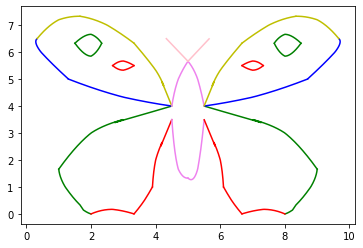

In [4]:
'PARTE IZQUIERDA'

# Tramo verde 1
ptosx = [1, 2, 3, 4.5]
x = np.array (ptosx)
ptosy = [1.66, 3, 3.5, 4]
y = np.array (ptosy)
plotspline (x,y,'g')

# Tramo verde 2
ptosx = [1, 1.2, 1.66, 2]
x = np.array (ptosx)
ptosy = [1.66, 1, 0.33, 0]
y = np.array (ptosy)
plotspline (x,y,'g')

# Tramo rojo 1
ptosx = [2, 2.66, 3.33]
x = np.array (ptosx)
ptosy = [0, 0.17, 0]
y = np.array (ptosy)
plotspline (x,y,'r')

# Tramo rojo 2
ptosx = [3.33, 3.65, 3.9]
x = np.array (ptosx)
ptosy = [0, 0.5, 1]
y = np.array (ptosy)
plotspline (x,y,'r')

# Tramo rojo 3
ptosx = [3.9, 4, 4.2, 4.5]
x = np.array (ptosx)
ptosy = [1, 2, 2.66, 3.5]
y = np.array (ptosy)
plotspline (x,y,'r')

# Tramo azul 1
ptosx = [0.33, 0.45, 1.3]
x = np.array (ptosx)
ptosy = [6.5, 6, 5]
y = np.array (ptosy)
plotspline (x,y,'b')

# Tramo azul 2
ptosx = [1.3, 3, 4.5]
x = np.array (ptosx)
ptosy = [5, 4.33, 4]
y = np.array (ptosy)
plotspline (x,y,'b')

# Tramo amarillo 1
ptosx = [0.33, 1, 1.66]
x = np.array (ptosx)
ptosy = [6.5, 7.2, 7.33]
y = np.array (ptosy)
plotspline (x,y,'y')

# Tramo amarillo 2
ptosx = [1.66, 2.5, 3.33]
x = np.array (ptosx)
ptosy = [7.33, 7, 6.33]
y = np.array (ptosy)
plotspline (x,y,'y')

# Tramo amarillo 3
ptosx = [3.33, 4, 4.25, 4.5]
x = np.array (ptosx)
ptosy = [6.33, 5.33, 4.75, 4]
y = np.array (ptosy)
plotspline (x,y,'y')

'CENTRO'

# Tramo violeta 1
ptosx = [4.5, 4.7, 5]
x = np.array (ptosx)
ptosy = [3.5, 1.66, 1.33]
y = np.array (ptosy)
plotspline (x,y,'violet')

# Tramo violeta 2
ptosx = [5, 5.3, 5.5]
x = np.array (ptosx)
ptosy = [1.33, 1.66, 3.5]
y = np.array (ptosy)
plotspline (x,y,'violet')
         
# Tramo violeta 3
ptosx = [4.5, 4.7, 5]
x = np.array (ptosx)
ptosy = [4, 5, 5.66]
y = np.array (ptosy)
plotspline (x,y,'violet')

# Tramo violeta 4
ptosx = [5, 5.3, 5.5]
x = np.array (ptosx)
ptosy = [5.66, 5, 4]
y = np.array (ptosy)
plotspline (x,y,'violet')

# Tramo rosa 1
ptosx = [4.33, 5]
x = np.array (ptosx)
ptosy = [6.5, 5.66]
y = np.array (ptosy)
plotspline (x,y,'pink')

# Tramo rosa 2
ptosx = [5, 5.66]
x = np.array (ptosx)
ptosy = [5.66, 6.5]
y = np.array (ptosy)
plotspline (x,y,'pink') 


'PARTE DERECHA'

# Tramo verde 1
ptosx = [9, 8, 7, 5.5]
x = np.array (ptosx)
ptosy = [1.66, 3, 3.5, 4]
y = np.array (ptosy)
plotspline (x,y,'g')

# Tramo verde 2
ptosx = [9, 8.8, 8.34, 8]
x = np.array (ptosx)
ptosy = [1.66, 1, 0.33, 0]
y = np.array (ptosy)
plotspline (x,y,'g')

# Tramo rojo 1
ptosx = [8, 7.34, 6.67]
x = np.array (ptosx)
ptosy = [0, 0.17, 0]
y = np.array (ptosy)
plotspline (x,y,'r')

# Tramo rojo 2
ptosx = [6.67, 6.35, 6.1]
x = np.array (ptosx)
ptosy = [0, 0.5, 1]
y = np.array (ptosy)
plotspline (x,y,'r')

# Tramo rojo 3
ptosx = [6.1, 6, 5.8, 5.5]
x = np.array (ptosx)
ptosy = [1, 2, 2.66, 3.5]
y = np.array (ptosy)
plotspline (x,y,'r')

# Tramo azul 1
ptosx = [9.67, 9.55, 8.7]
x = np.array (ptosx)
ptosy = [6.5, 6, 5]
y = np.array (ptosy)
plotspline (x,y,'b')

# Tramo azul 2
ptosx = [8.7, 7, 5.5]
x = np.array (ptosx)
ptosy = [5, 4.33, 4]
y = np.array (ptosy)
plotspline (x,y,'b')

# Tramo amarillo 1
ptosx = [9.67, 9, 8.34]
x = np.array (ptosx)
ptosy = [6.5, 7.2, 7.33]
y = np.array (ptosy)
plotspline (x,y,'y')

# Tramo amarillo 2
ptosx = [8.34, 7.5, 6.67]
x = np.array (ptosx)
ptosy = [7.33, 7, 6.33]
y = np.array (ptosy)
plotspline (x,y,'y')

# Tramo amarillo 3
ptosx = [6.67, 6, 5.75, 5.5]
x = np.array (ptosx)
ptosy = [6.33, 5.33, 4.75, 4]
y = np.array (ptosy)
plotspline (x,y,'y')

'CÍRCULOS INTERIORES'

# Círculo izquierdo superior
ptosx = [1.5, 2, 2.33]
x = np.array (ptosx)
ptosy = [6.33, 6.66, 6.33]
y = np.array (ptosy)
plotspline (x,y,'g')

ptosx = [1.5, 2, 2.33]
x = np.array (ptosx)
ptosy = [6.33, 5.85, 6.33]
y = np.array (ptosy)
plotspline (x,y,'g')

# Círculo izquierdo inferior
ptosx = [2.67, 3, 3.33]
x = np.array (ptosx)
ptosy = [5.5, 5.67, 5.5]
y = np.array (ptosy)
plotspline (x,y,'r')

ptosx = [2.67, 3, 3.33]
x = np.array (ptosx)
ptosy = [5.5, 5.33, 5.5]
y = np.array (ptosy)
plotspline (x,y,'r')

# Círculo derecho superior
ptosx = [8.5, 8, 7.67]
x = np.array (ptosx)
ptosy = [6.33, 6.66, 6.33]
y = np.array (ptosy)
plotspline (x,y,'g')

ptosx = [8.5, 8, 7.67]
x = np.array (ptosx)
ptosy = [6.33, 5.85, 6.33]
y = np.array (ptosy)
plotspline (x,y,'g')

# Círculo derecho inferior
ptosx = [7.33, 7, 6.67]
x = np.array (ptosx)
ptosy = [5.5, 5.67, 5.5]
y = np.array (ptosy)
plotspline (x,y,'r')

ptosx = [7.33, 7, 6.67]
x = np.array (ptosx)
ptosy = [5.5, 5.33, 5.5]
y = np.array (ptosy)
plotspline (x,y,'r')
